**Sistemas Difusos**

* _Maria Alejandra Bonilla Diaz - 20251595002_ 
* _Alvaro Alejandro Zarabanda Gutierrez – 20251595006_


**Librerias e imports**

In [ ]:
%%capture
%pip install numpy
%pip install matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#
1. Considere un conjunto fuzzy $A$ definido en el universo de discurso $X = \in \mathbb{R} \mid 0 \leq x \leq 10 \}$, el 
cual es representado por la siguiente función de pertenecia:
$$
\mu_A(x) = \begin{cases}
0.5x - 1.5, & \text{si } 3 \leq x \leq 5 \\
-0.5x + 3.5, & \text{si } 5 < x \leq 7 \\
0, & \text{en otro caso}
\end{cases}
$$

##
a) Realice el gráfico de la función de pertenencia, indicando su tipo.

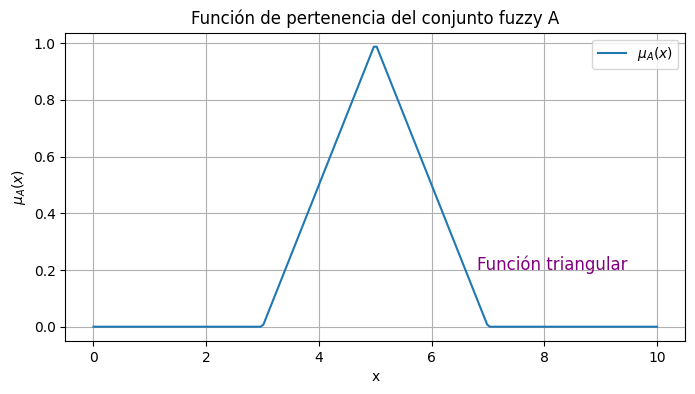

In [ ]:
def mu_A(x):
    if 3 <= x <= 5:
        return 0.5 * x - 1.5
    elif 5 < x <= 7:
        return -0.5 * x + 3.5
    else:
        return 0

x_vals = np.linspace(0, 10, 200)
y_vals = [mu_A(x) for x in x_vals]

plt.figure(figsize=(8,4))
plt.plot(x_vals, y_vals, label=r'$\mu_A(x)$')
plt.title('Función de pertenencia del conjunto fuzzy A')
plt.xlabel('x')
plt.ylabel(r'$\mu_A(x)$')
plt.grid(True)
plt.text(6.8, 0.2, 'Función triangular', fontsize=12, color='purple')
plt.legend()
plt.show()

## 
b) Conociendo que esta función representa un conjunto que se refiere a la temperatura "media" de un determinado proceso, explique cuál es el significado que esta conlleva.

La función de pertenencia describe cómo cada valor de temperatura dentro del rango [0, 10] se asocia con el concepto de “temperatura media” en el proceso. Los valores cercanos a 3 y 7 tienen pertenencia cero (no son considerados “medios”), mientras que los valores entre 3 y 7 tienen distintos grados de pertenencia, alcanzando el máximo en x = 5. Esto significa que la temperatura “media” está representada principalmente por valores cercanos a 5, y los valores más alejados son menos representativos de ese concepto.



##
c) Explique si el anterior conjunto fuzzy es considerado un conjunto normalizado.

Un conjunto fuzzy es considerado normalizado si existe al menos un elemento en el universo de discurso cuya función de pertenencia alcanza el valor máximo de 1. En este caso, la función de pertenencia $\mu_A(x)$ alcanza el valor 1 cuando $x = 5$. Por lo tanto, el conjunto fuzzy $A$ es normalizado.

##
d) Explique si el anterior conjunto fuzzy es considerado convexo.

Un conjunto fuzzy es convexo si para cualquier par de puntos $x_1$ y $x_2$ en el universo de discurso y cualquier $\lambda \in [0,1]$, se cumple que:
$$
\mu_A(\lambda x_1 + (1-\lambda)x_2) \geq \min\{\mu_A(x_1), \mu_A(x_2)\}
$$
En este caso, la función de pertenencia $\mu_A(x)$ es una función triangular, que es continua y no presenta "valles" entre los extremos. Por lo tanto, el conjunto fuzzy $A$ es considerado convexo.

##
e) Obtenga el conjunto soporte asociado al anterior conjunto fuzzy.

El conjunto soporte de un conjunto fuzzy es el subconjunto del universo de discurso donde la función de pertenencia es estrictamente mayor que cero, es decir, $\mu_A(x) > 0$. Para este caso, el conjunto soporte es el intervalo $(3, 7)$, ya que en ese rango la función de pertenencia toma valores positivos.

$$
\text{Supp}(A) = \{ x \in X \mid 3 < x < 7 \}
$$

#
2. Calcule la cardinalidad de los siguientes conjuntos fuzzy discretos:

La cardinalidad de un conjunto difuso se calcula sumando los valores de la función de pertenencia de todos sus elementos:
$$
\text{Card}(A) = \sum_{i} \mu_A(x_i)
$$

##
a) $$A = 0.3/x_1 + 0.5/x_2 + 0.9/x_3 + 0.4/x_4 + 0.1/x_5.$$


La cardinalidad es:
$$
\text{Card}(A) = 0.3 + 0.5 + 0.9 + 0.4 + 0.1 = 2.2
$$

##
b) $$A = 0.0/x_1 + 0.4/x_2 + 1.0/x_3 + 1.0/x_4 + 0.4/x_5 + 0.0/x_6.$$


La cardinalidad es:
$$
\text{Card}(A) = 0.0 + 0.4 + 1.0 + 1.0 + 0.4 + 0.0 = 2.8
$$

##
c) $$\mu_C(x) = \frac{x}{x+1}, \quad \text{con } x \in \{0, 1, 2, \ldots, 10\}.$$

La cardinalidad es:
$$
\text{Card}(C) = \sum_{x=0}^{10} \frac{x}{x+1}
$$
Donde se suman los valores de $\mu_C(x)$ para cada $x$ en $\{0, 1, 2, \ldots, 10\}$.

In [ ]:
card_C = sum(x / (x + 1) for x in range(11))
print(f"La cardinalidad de Uc es: {card_C:.4f}")

La cardinalidad de Uc es: 7.9801


#
3. Un equipo de ingenieros y cientificos obtuvo a partir de experimentos diversos valores de $α-cortes$ referentes a un conjunto fuzzy $V$ que está siendo mapeado, el cual representa el tasa de flujo $v$ de una columna de destilación de petróleo. Los valores referentes a los α-cortes son los 
siguientes:
$$
V_{0.00} = \{ v \in \mathbb{R} \mid 2.0 \leq v \leq 8.0 \} \\
V_{0.25} = \{ v \in \mathbb{R} \mid 2.5 \leq v \leq 7.5 \} \\
V_{0.50} = \{ v \in \mathbb{R} \mid 3.0 \leq v \leq 7.0 \} \\
V_{0.75} = \{ v \in \mathbb{R} \mid 3.5 \leq v \leq 6.5 \} \\
V_{1.00} = \{ v \in \mathbb{R} \mid 4.0 \leq v \leq 6.0 \}
$$


A partir de los anteriores valores reconstruya una gráfica representativa de este conjunto, y su
expresión analítica.

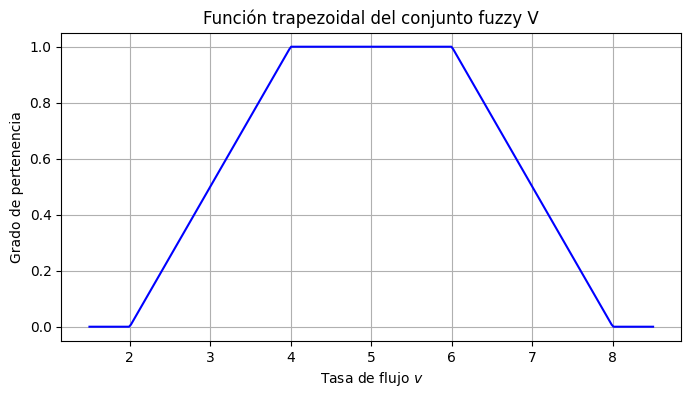

In [ ]:
def mu_V(v):
    if v < 2:
        return 0
    elif 2 <= v < 4:
        return 0.5 * v - 1
    elif 4 <= v <= 6:
        return 1
    elif 6 < v <= 8:
        return -0.5 * v + 4
    else:
        return 0

v_vals = np.linspace(1.5, 8.5, 300)
mu_vals = [mu_V(v) for v in v_vals]

plt.figure(figsize=(8,4))
plt.plot(v_vals, mu_vals, color='blue')
plt.title('Función trapezoidal del conjunto fuzzy V')
plt.xlabel('Tasa de flujo $v$')
plt.ylabel('Grado de pertenencia')
plt.grid(True)
plt.show()

La expresión analítica de la función de membresía trapezoidal, segun lo obtenido a partir de los $α-cortes$ es:
$$
\mu_V(v) = \begin{cases}
0, & v < 2 \\
0.5v - 1, & 2 \leq v < 4 \\
1, & 4 \leq v \leq 6 \\
-0.5v + 4, & 6 < v \leq 8 \\
0, & v > 8
\end{cases}
$$

#
4. Un determinado conjunto fuzzy deberá ser mapeado utilizando la función de pertinencia 
triangular o trapezoidal. Duscuta las razones por las cuales usted usaría una u otra función para 
representar dicho conjunto. Explique sus argumentos mediante un ejemplo.

Las funciones de pertenencia **triangular** y **trapezoidal** son ampliamente utilizadas para modelar conjuntos difusos debido a su simplicidad y capacidad de representar diferentes grados de incertidumbre.

**Función triangular:**
- Se utiliza cuando el concepto difuso tiene un valor central bien definido y los valores alejados de ese centro disminuyen linealmente en pertenencia.
- Es útil para representar situaciones donde solo hay un valor "más representativo" y la transición hacia los extremos es simétrica y rápida.
- Ejemplo: La temperatura "media" de un proceso, donde el valor más representativo es 5°C y los valores se alejan rápidamente de ese centro.

**Función trapezoidal:**
- Se emplea cuando existe un rango de valores igualmente representativos (zona plana), y la pertenencia disminuye linealmente fuera de ese rango.
- Es ideal para modelar conceptos donde hay una región de certeza y regiones de transición.
- Ejemplo: El concepto de "presión adecuada" en una máquina, donde cualquier valor entre 4 y 6 bar es igualmente adecuado, pero valores menores o mayores son menos aceptables.

**Como elegir una u otra:**
- Si el fenómeno tiene un único valor óptimo y la incertidumbre es baja, se prefiere la triangular.
- Si hay un intervalo de valores óptimos y la incertidumbre es mayor, se usa la trapezoidal.


**Conclusión:**
La elección depende de la naturaleza del fenómeno y del grado de certeza que se desea modelar. La triangular es más restrictiva y la trapezoidal más flexible para intervalos óptimos.

#
5. Explique si la siguiente afirmación es verdadera o falsa. “ Si un conjunto difuso continuo en su 
universo de discurso tuviera algunos de sus α-cortes también continuos, entonces este conjunto es 
considerado convexo”.

**Afirmación:** “Si un conjunto difuso continuo en su universo de discurso tuviera algunos de sus α-cortes también continuos, entonces este conjunto es considerado convexo”.

**Respuesta:** La afirmación es **falsa**.

**Explicación:**
- Para que un conjunto fuzzy sea convexo, **todos** sus α-cortes (para cualquier $\alpha \in (0,1]$) deben ser conjuntos convexos, es decir, intervalos continuos en el universo de discurso.
- El hecho de que algunos α-cortes sean continuos no garantiza la convexidad del conjunto fuzzy. Puede haber valores de $\alpha$ para los cuales el α-corte no sea convexo (por ejemplo, esté formado por dos intervalos separados).

**Definición formal:**
Un conjunto fuzzy $A$ es convexo si para cualquier $\alpha \in (0,1]$, el α-corte $A_\alpha = \{x \mid \mu_A(x) \geq \alpha\}$ es un conjunto convexo.

**Ejemplo:**
Supongamos que la función de pertenencia tiene una muesca o valle, por lo que para ciertos valores de $\alpha$ el α-corte se divide en dos intervalos separados. En ese caso, el conjunto fuzzy no es convexo, aunque para otros valores de $\alpha$ el α-corte sí sea continuo (podria ser una funcion bimodal).

**Conclusión:**
La convexidad requiere que todos los α-cortes sean convexos (intervalos continuos), no solo algunos. Por lo tanto, la afirmación es falsa.

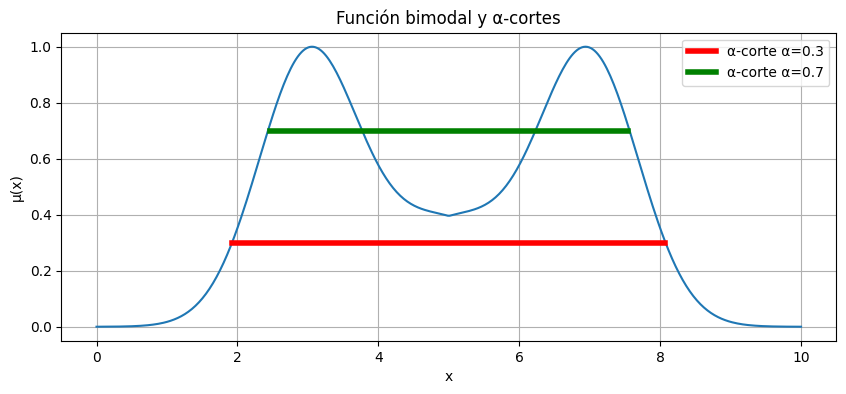

In [ ]:
def mu_bimodal(x):
    peak1 = np.exp(-((x-3)**2)/1.0)
    peak2 = np.exp(-((x-7)**2)/1.0)
    valley = 0.4 * np.exp(-((x-5)**2)/2.0)
    val = np.maximum(peak1, peak2) + valley
    return val / np.max([np.maximum(peak1, peak2) + valley for peak1, peak2, valley in zip([np.exp(-((xi-3)**2)/1.0) for xi in np.linspace(0,10,400)], [np.exp(-((xi-7)**2)/1.0) for xi in np.linspace(0,10,400)], [0.4 * np.exp(-((xi-5)**2)/2.0) for xi in np.linspace(0,10,400)])])

x_vals = np.linspace(0, 10, 400)
mu_vals = [mu_bimodal(x) for x in x_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, mu_vals)
plt.title('Función bimodal y α-cortes')
plt.xlabel('x')
plt.ylabel('μ(x)')
plt.grid(True)

for alpha, color in zip([0.3, 0.7], ['red', 'green']):
    x_alpha = [x for x in x_vals if mu_bimodal(x) >= alpha]
    y_alpha = [alpha]*len(x_alpha)
    plt.plot(x_alpha, y_alpha, color=color, lw=4, label=f'α-corte α={alpha}')

plt.legend()
plt.show()